![MLU Logo](../../data/MLU_Logo.png)

In [1]:
%pip install -q -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

# Create a little test dataset
np.random.seed(8675309)
x = np.random.randn(100,2)
y = np.sum(x**2,axis=1)

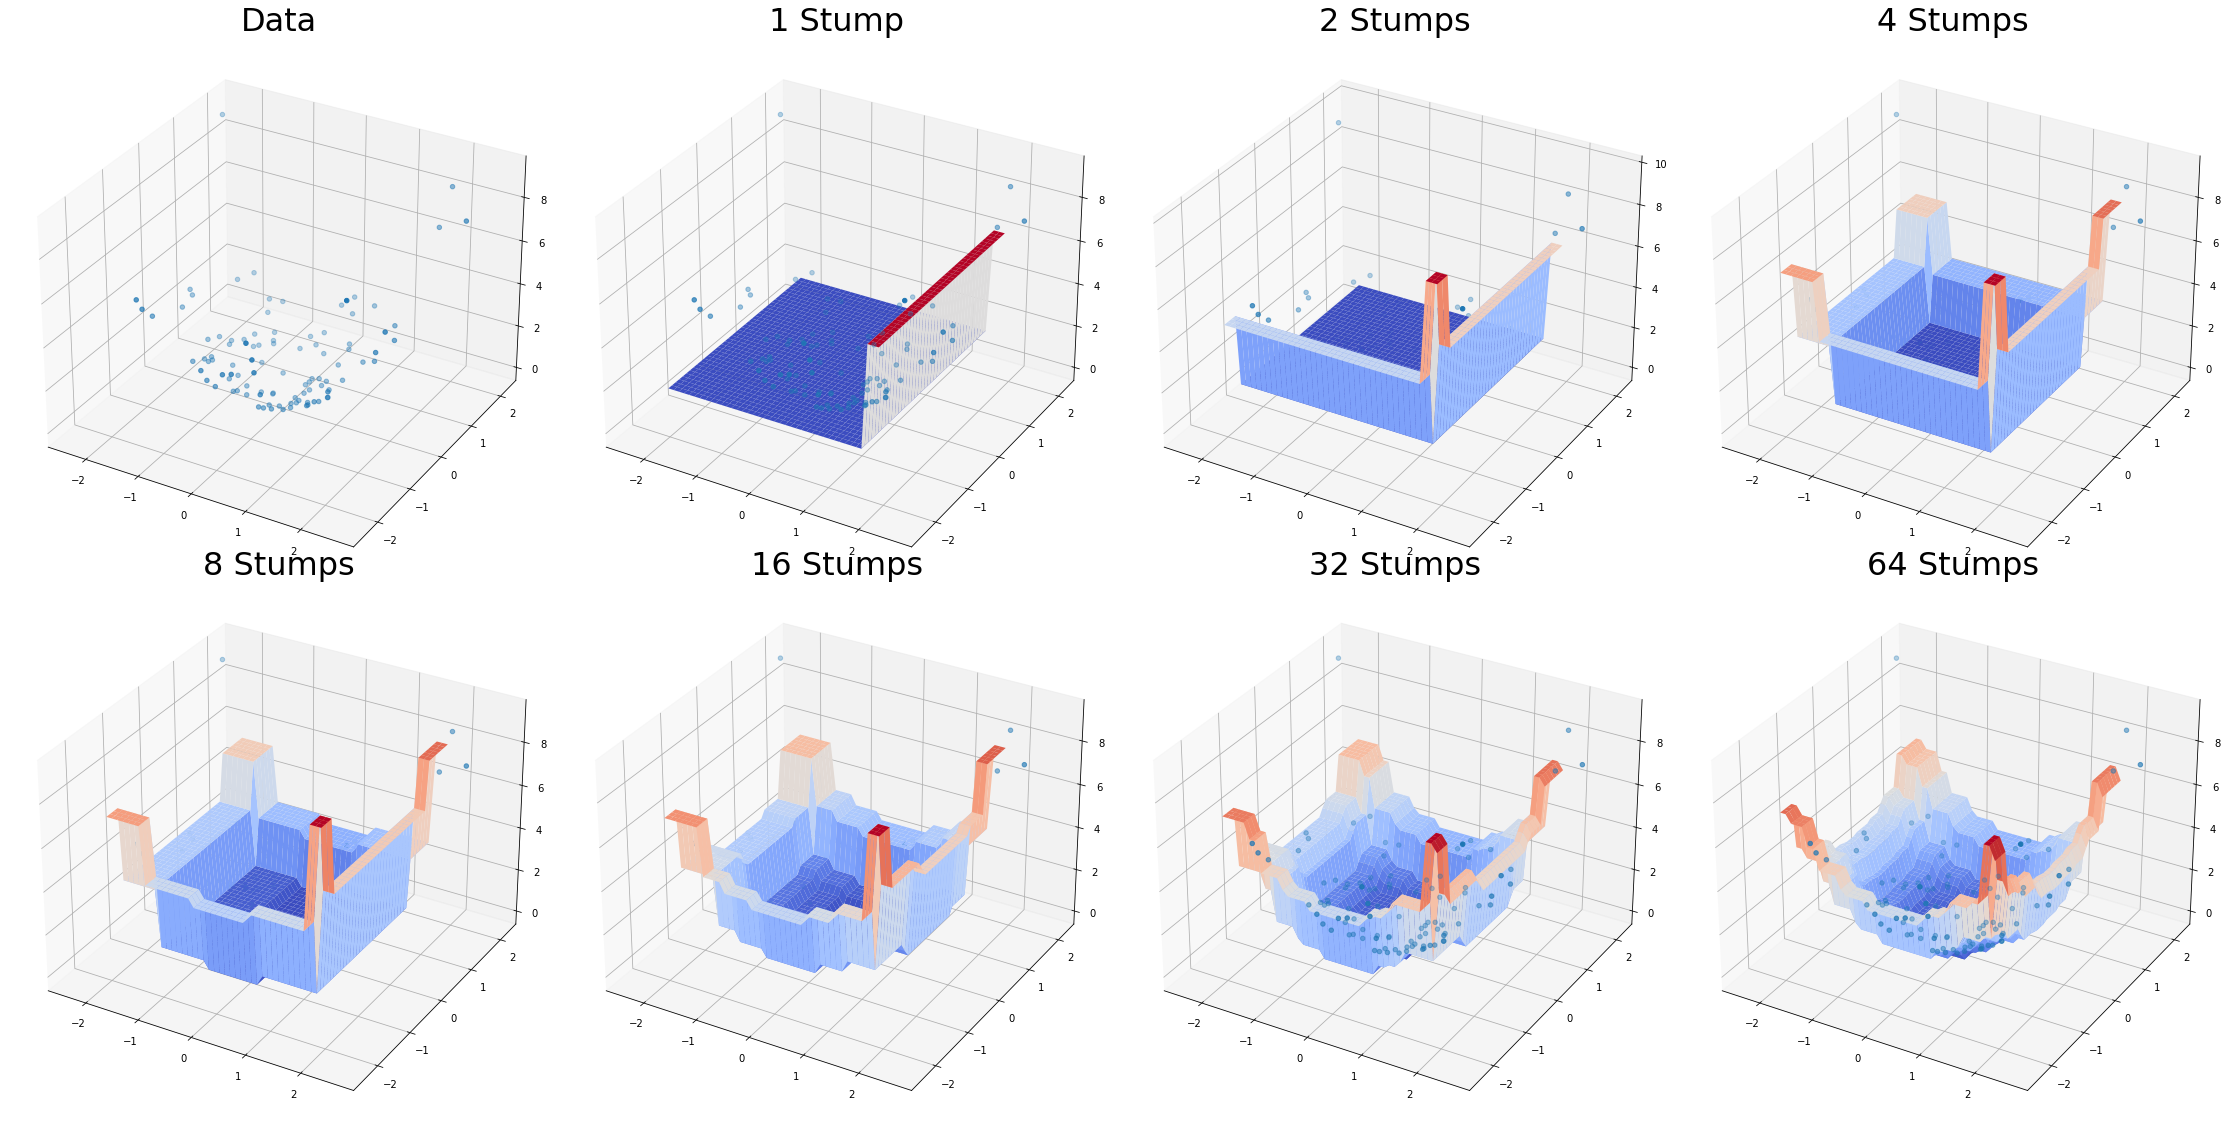

In [3]:
# Create a testing grid
steps = np.arange(-2,2,0.1)
ones = np.ones(steps.shape)
xc = steps*ones.reshape(-1,1)
yc = xc.T

xv = xc.flatten()
yv = yc.flatten()
test_data = np.stack((xv,yv)).T

# Learn a series of Gradient Boosted Decision Stumps as indicated in lecture
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(40,20))
ax = plt.subplot(2,4,1, projection='3d')
ax.scatter(x[:,0],x[:,1],y)
plt.title("Data",size=32)

for i in range(7) :
    model = GradientBoostingRegressor(loss='ls', learning_rate=1.0, n_estimators=2**i, criterion='mse', max_depth=1,random_state=1701)
    model.fit(x,y)
    test_y = model.predict(test_data)
    
    ax = plt.subplot(2,4,i+2, projection='3d')
    ax.plot_surface(xc,yc,test_y.reshape(xc.shape),cmap=cm.coolwarm,linewidth=0)
    ax.scatter(x[:,0],x[:,1],y)
    if i == 0:
        plt.title("1 Stump",size=32)
    else :
        plt.title("{} Stumps".format(2**i),size=32)
plt.subplots_adjust(wspace=0, hspace=0)